In [3]:
import os, shutil

In [4]:
original_dataset_dir = '/Users/natsc/Downloads/dogs-vs-cats/train'
base_dir = '/Users/natsc/Desktop/machine_learning/deeplearningwithpython/cats-and-dogs-dataset-small'



os.mkdir(base_dir)

In [5]:

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

FileExistsError: [WinError 183] Eine Datei kann nicht erstellt werden, wenn sie bereits vorhanden ist: '/Users/natsc/Desktop/machine_learning/deeplearningwithpython/cats-and-dogs-dataset-small\\train'

In [6]:
train_cats_dir = os.path.join(train_dir, 'cats')


train_dogs_dir = os.path.join(train_dir, 'dogs')


validation_cats_dir = os.path.join(validation_dir, 'cats')


validation_dogs_dir = os.path.join(validation_dir, 'dogs')


test_cats_dir = os.path.join(test_dir, 'cats')


test_dogs_dir = os.path.join(test_dir,'dogs')

os.mkdir(train_cats_dir)

os.mkdir(train_dogs_dir)

os.mkdir(validation_cats_dir)

os.mkdir(test_dogs_dir)

os.mkdir(validation_cats_dir)

os.mkdir(test_cats_dir)




FileExistsError: [WinError 183] Eine Datei kann nicht erstellt werden, wenn sie bereits vorhanden ist: '/Users/natsc/Desktop/machine_learning/deeplearningwithpython/cats-and-dogs-dataset-small\\train\\cats'

In [53]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir,fname)
    os.remove(dst)

In [46]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [54]:
print('total training cat images', len(os.listdir(train_cats_dir)))
print('total training dog images',len(os.listdir(train_dogs_dir)))

print('total validation cat images', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images 1000
total training dog images 1000
total validation cat images 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [7]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu',input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid'),

    
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),metrics=['acc'])


c:\Users\natsc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from ctypes.wintypes import tagRECT


train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_genarator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode='binary'
    )

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_genarator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
history = model.fit_generator(
    train_genarator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50
)

Epoch 1/30


C:\Users\natsc\AppData\Local\Temp\ipykernel_6728\2916392198.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 29s 278ms/step - loss: 0.6961 - acc: 0.5190 - val_loss: 0.6802 - val_acc: 0.5150
Epoch 2/30
100/100 [==============================] - 23s 229ms/step - loss: 0.6651 - acc: 0.6030 - val_loss: 0.6742 - val_acc: 0.5560
Epoch 3/30
100/100 [==============================] - 23s 229ms/step - loss: 0.6313 - acc: 0.6540 - val_loss: 0.6281 - val_acc: 0.6510
Epoch 4/30
100/100 [==============================] - 23s 230ms/step - loss: 0.5908 - acc: 0.6895 - val_loss: 0.6301 - val_acc: 0.6350
Epoch 5/30
100/100 [==============================] - 22s 217ms/step - loss: 0.5466 - acc: 0.7325 - val_loss: 0.5851 - val_acc: 0.6900
Epoch 6/30
100/100 [==============================] - 22s 217ms/step - loss: 0.5076 - acc: 0.7495 - val_loss: 0.6052 - val_acc: 0.6700
Epoch 7/30
100/100 [==============================] - 22s 218ms/step - loss: 0.4780 - acc: 0.7720 - val_loss: 0.5649 - val_acc: 0.7070
Epoch 8/30
100/100 [==============================] - 22s 218ms/st

In [8]:
import matplotlib.pyplot as plt

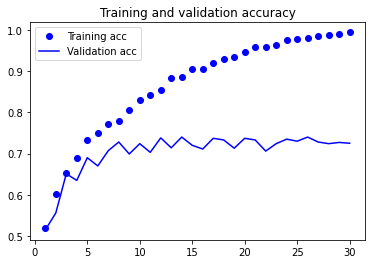

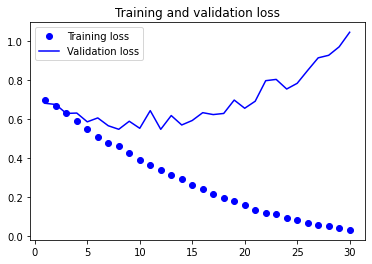

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs,val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [9]:



datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range =0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode ='nearest'
)

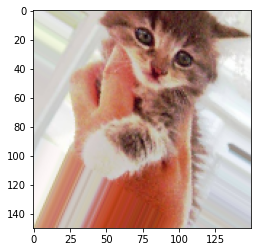

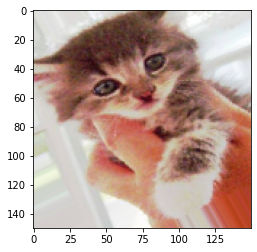

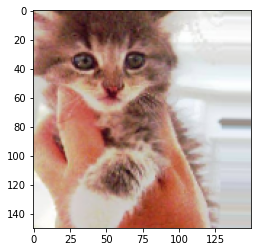

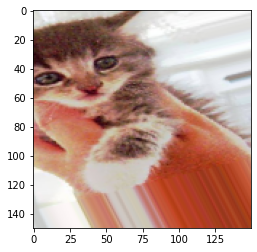

In [59]:


image = tf.keras.preprocessing.image
fnames = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]


img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break


plt.show()



In [48]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu',input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid'),

    
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),metrics=['acc'])

c:\Users\natsc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [60]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size = 32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [73]:
history = model.fit(
    train_generator,
    steps_per_epoch= 62,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=31,
)

Epoch 1/100
62/62 [==============================] - 22s 361ms/step - loss: 0.3482 - acc: 0.8435 - val_loss: 0.4669 - val_acc: 0.7893
Epoch 2/100
62/62 [==============================] - 23s 364ms/step - loss: 0.3694 - acc: 0.8318 - val_loss: 0.3824 - val_acc: 0.8306
Epoch 3/100
62/62 [==============================] - 22s 356ms/step - loss: 0.3561 - acc: 0.8445 - val_loss: 0.3938 - val_acc: 0.8306
Epoch 4/100
62/62 [==============================] - 22s 355ms/step - loss: 0.3301 - acc: 0.8420 - val_loss: 0.4390 - val_acc: 0.7923
Epoch 5/100
62/62 [==============================] - 22s 357ms/step - loss: 0.3377 - acc: 0.8542 - val_loss: 0.3795 - val_acc: 0.8417
Epoch 6/100
62/62 [==============================] - 22s 359ms/step - loss: 0.3439 - acc: 0.8552 - val_loss: 0.3763 - val_acc: 0.8337
Epoch 7/100
62/62 [==============================] - 23s 365ms/step - loss: 0.3426 - acc: 0.8511 - val_loss: 0.3757 - val_acc: 0.8367
Epoch 8/100
62/62 [==============================] - 22s 357ms

In [ ]:
from math import floor

In [ ]:
tf.keras.preprocessing.image.ImageDataGenerator

In [63]:
train_dir

'/Users/natsc/Desktop/machine_learning/deeplearningwithpython/cats-and-dogs-dataset-small\\train'

In [64]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size = 32,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.


In [66]:
train_genarator.n//train_genarator.batch_size

100

In [74]:
model.save('cats_and_dogs_small.h5')

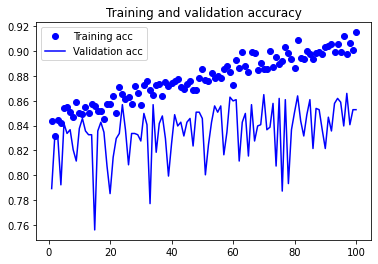

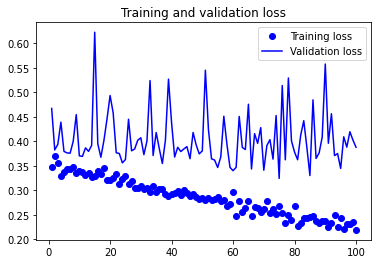

In [75]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs,val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [12]:
from keras.applications import VGG16
conv_net = VGG16(weights='imagenet',include_top = False,input_shape =(150,150,3))


In [78]:
conv_net.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

#FAST FEATURE AUGMENTATION WITHOUT DATA AUGMENTATION

In [14]:
#import os
import numpy as np

ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator()

base_dir = '/Users/natsc/Desktop/machine_learning/deeplearningwithpython/cats-and-dogs-dataset-small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir,'test')

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150,150),
        batch_size=batch_size,
        class_mode='binary'
    )
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_net.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i +1 ) * batch_size] = labels_batch
        i += 1
        if i  * batch_size >= sample_count:
            break
    return features,labels



In [15]:

train_features, train_labels = extract_features(train_dir,2000)
validation_features, validation_labels = extract_features(validation_dir,1000)
test_features, test_labels = extract_features(test_dir,1000)

train_features = np.reshape(train_features, (2000,4*4*512))
validation_features= np.reshape(validation_features,(1000,4*4*512))
test_features = np.reshape(test_features,(1000,4*4*512))


Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 474ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 481ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 476ms/step


In [120]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256,activation='relu', input_dim=4*4*512),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])

In [121]:
history = model.fit(train_features, train_labels,epochs=30,batch_size=20,validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 2s 15ms/step - loss: 0.5840 - acc: 0.6815 - val_loss: 0.4346 - val_acc: 0.8450
Epoch 2/30
100/100 [==============================] - 1s 14ms/step - loss: 0.4312 - acc: 0.8085 - val_loss: 0.3668 - val_acc: 0.8470
Epoch 3/30
100/100 [==============================] - 1s 14ms/step - loss: 0.3505 - acc: 0.8560 - val_loss: 0.3201 - val_acc: 0.8810
Epoch 4/30
100/100 [==============================] - 1s 14ms/step - loss: 0.3185 - acc: 0.8640 - val_loss: 0.3014 - val_acc: 0.8880
Epoch 5/30
100/100 [==============================] - 1s 14ms/step - loss: 0.2858 - acc: 0.8880 - val_loss: 0.2830 - val_acc: 0.8900
Epoch 6/30
100/100 [==============================] - 1s 14ms/step - loss: 0.2649 - acc: 0.8940 - val_loss: 0.2705 - val_acc: 0.8940
Epoch 7/30
100/100 [==============================] - 1s 14ms/step - loss: 0.2447 - acc: 0.9065 - val_loss: 0.2617 - val_acc: 0.8970
Epoch 8/30
100/100 [==============================] - 1s 15ms/step - 

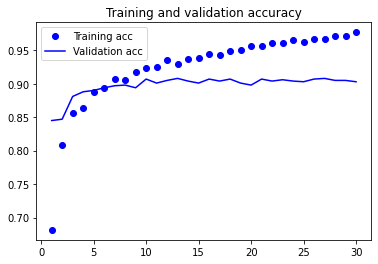

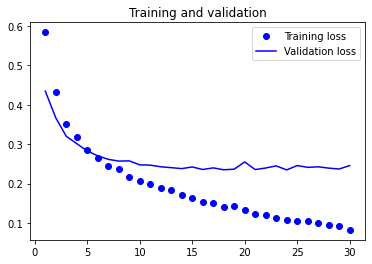

In [124]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss,'bo',label='Training loss')
plt.plot(epochs, val_loss,'b', label='Validation loss')
plt.title('Training and validation')
plt.legend()

plt.show()

#FEATURE EXTRACTION WITH DATA AUGMENTATION

In [16]:
model = tf.keras.Sequential([
    conv_net,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation ='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])


In [128]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_28 (Dense)            (None, 256)               2097408   
                                                                 
 dense_29 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [17]:
conv_net.trainable = False

In [19]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale =1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode='nearest'
)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_genarator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(train_genarator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

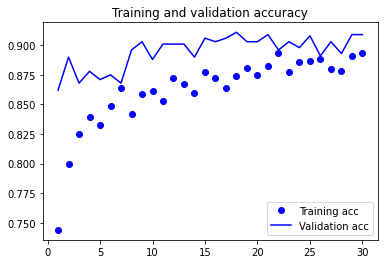

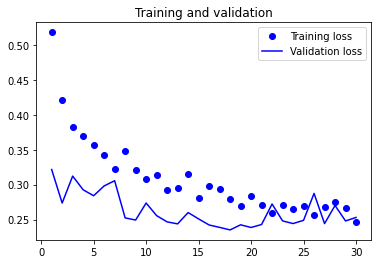

In [132]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss,'bo',label='Training loss')
plt.plot(epochs, val_loss,'b', label='Validation loss')
plt.title('Training and validation')
plt.legend()

plt.show()

#FINE-TUNING

In [20]:
conv_net.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [21]:
conv_net.trainable = True

set_trainable = False
for layer in conv_net.layers:
    if layer.name == 'block5_convi':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
    


In [22]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),metrics=['acc'])
history = model.fit(train_genarator,steps_per_epoch=100,epochs=25,validation_data=validation_generator,
validation_steps=50)

Epoch 1/25
100/100 [==============================] - 75s 750ms/step - loss: 0.3827 - acc: 0.8245 - val_loss: 0.2986 - val_acc: 0.8730
Epoch 2/25
100/100 [==============================] - 74s 740ms/step - loss: 0.3751 - acc: 0.8365 - val_loss: 0.2917 - val_acc: 0.8760
Epoch 3/25
100/100 [==============================] - 73s 731ms/step - loss: 0.3697 - acc: 0.8345 - val_loss: 0.2848 - val_acc: 0.8770
Epoch 4/25
100/100 [==============================] - 73s 728ms/step - loss: 0.3590 - acc: 0.8380 - val_loss: 0.2813 - val_acc: 0.8740
Epoch 5/25
100/100 [==============================] - 73s 736ms/step - loss: 0.3576 - acc: 0.8390 - val_loss: 0.2780 - val_acc: 0.8840
Epoch 6/25
100/100 [==============================] - 73s 734ms/step - loss: 0.3550 - acc: 0.8375 - val_loss: 0.2751 - val_acc: 0.8830
Epoch 7/25
100/100 [==============================] - 75s 751ms/step - loss: 0.3548 - acc: 0.8445 - val_loss: 0.2707 - val_acc: 0.8820
Epoch 8/25
100/100 [==============================] - 7

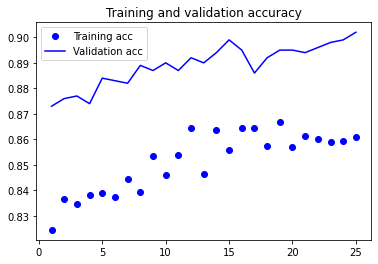

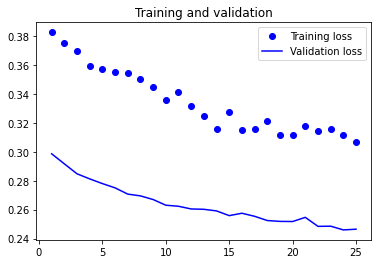

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss,'bo',label='Training loss')
plt.plot(epochs, val_loss,'b', label='Validation loss')
plt.title('Training and validation')
plt.legend()

plt.show()

In [28]:



def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points




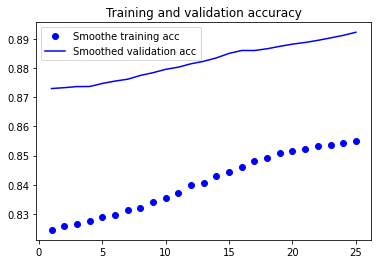

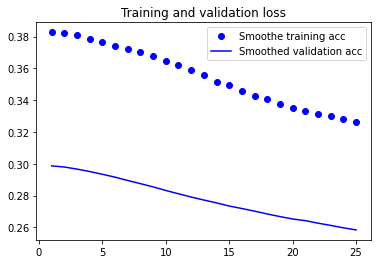

In [30]:



plt.plot(epochs,smooth_curve(acc),'bo', label='Smoothe training acc')
plt.plot(epochs,smooth_curve(val_acc),'b',label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend(
)
plt.figure()
plt.plot(epochs,smooth_curve(loss),'bo', label='Smoothe training acc')
plt.plot(epochs,smooth_curve(val_loss),'b',label='Smoothed validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [27]:
smooth_curve(acc)

[0.8245000243186951]

In [32]:
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=20,class_mode='binary')

test_loss,test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc',test_acc)

Found 1000 images belonging to 2 classes.


C:\Users\natsc\AppData\Local\Temp\ipykernel_8864\804507061.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss,test_acc = model.evaluate_generator(test_generator, steps=50)


test acc 0.8939999938011169
